In [29]:
import numpy as np
from scipy.stats import maxwell
from math import sqrt
from random import gauss
from matplotlib import pyplot as plt

T = 87
M_a = 6.63e-26
m_e = 9.1e-31
k_b = 1.38e-23

def v_to_E(v):
    return 0.5 * m_e * np.dot(v, v) * 6.242e18

def E_to_v(E):
    return sqrt(1.6e-19 * 2 * E / m_e)

def random_unit_vector():
    vec = [gauss(0, 1) for i in range(3)]
    mag = sum(x**2 for x in vec)**.5
    return np.array([x / mag for x in vec])

def random_velocity(eV):
    mag = E_to_v(eV)
    return random_unit_vector() * mag

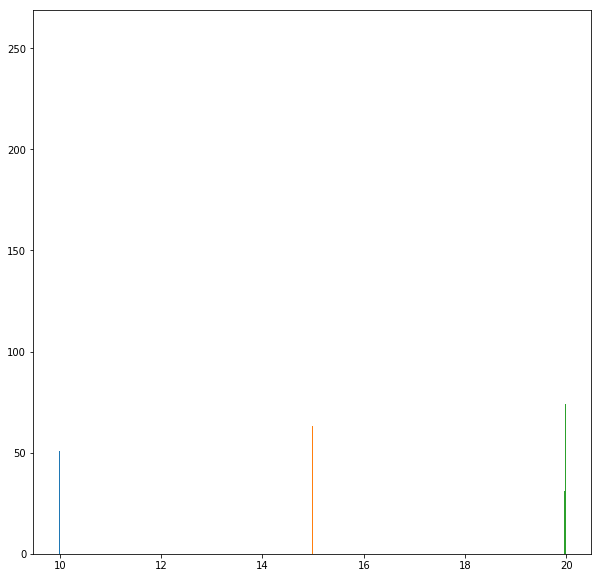

In [36]:
fig = plt.figure(figsize=(10,10))

en_list = [10, 15, 20]

for e in en_list:
    energies = []
    for i in range(1000):
        v = random_velocity(e)

        vm = maxwell.rvs(size=3, scale=134.568)
        u = np.dot(v - vm, v - vm)**0.5
        n = random_unit_vector()

        a = (M_a * u) * n
        b = (m_e) * v
        c = (M_a) * vm

        v1 = (a + b + c) / (m_e + M_a)

        # v = np.dot(v1, v1)**0.5 / np.dot(v, v)**0.5 * v
        v = v1
        
        energies.append(v_to_E(v))

    plt.hist(energies, label=str(e))

plt.show()